In [3]:
import arviz as az
import pandas as pd
import xarray as xr
import numpy as np
import pickle

from https://python.arviz.org/en/stable/getting_started/CreatingInferenceData.html

# 広い事前分布で長い時間を書けた結果(作品固有項なし)

各パラメーターの事前分布が一様分布~uniform(1e-6,1000);の場合はRhatが１に近づかなかった。ので指数分布、student t分布を用いた。


事前分布情報
```
maincharpower[t,l]~normal(mu_m,sigma_m);
bosspower[t,l]~normal(mu_b,sigma_b);
subpower[t,l]~normal(mu_s,sigma_s);


  mu_i~exponential(50);
  mu_m~exponential(100);
  mu_b~exponential(100);
  mu_s~exponential(100);;

  sigma_i~student_t(4,0,100);
  sigma_m~student_t(4,0,100);
  sigma_b~student_t(4,0,100);
  sigma_s~student_t(4,0,100);
 ```

### 計算に２日くらいかかった。

In [23]:
with open('fit_hyper.pkl', 'rb') as f:
    fit= pickle.load(f)
    
summary_hyper = az.summary(fit)
print(summary_hyper)


/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
maincharpower[0, 0]  7.965  2.702   3.033   13.405      0.068    0.048   
maincharpower[0, 1]  6.989  5.348   0.000   16.853      0.267    0.189   
maincharpower[0, 2]  7.067  5.257   0.001   16.262      0.106    0.075   
maincharpower[0, 3]  6.487  5.481   0.000   16.427      0.379    0.268   
maincharpower[0, 4]  6.276  5.310   0.001   15.829      0.415    0.294   
...                    ...    ...     ...      ...        ...      ...   
mu_s                 0.002  0.001   0.000    0.005      0.000    0.000   
sigma_i              8.531  0.548   7.611    9.653      0.078    0.057   
sigma_m              8.710  1.385   6.152   11.238      0.072    0.051   
sigma_b              0.001  0.000   0.000    0.001      0.000    0.000   
sigma_s              0.001  0.000   0.000    0.001      0.000    0.000   

                     ess_bulk  ess_tail  r_hat  
maincharpower[0, 0]    1477.0    5059.0   1.01  
maincharpower

## Rhatがうまく行った。

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

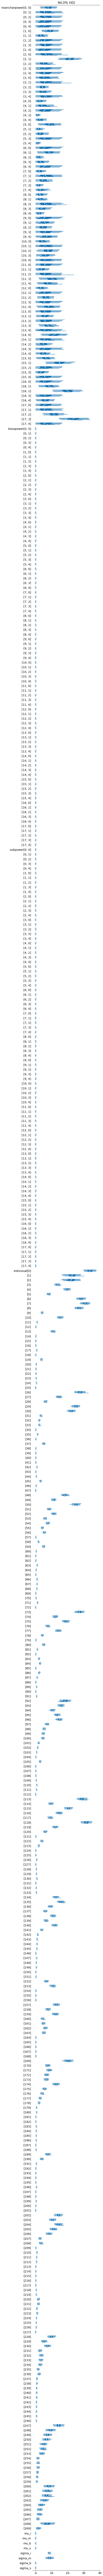

In [24]:
az.plot_forest(fit)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'maincharpower'}>,
        <AxesSubplot:title={'center':'maincharpower'}>],
       [<AxesSubplot:title={'center':'bosspower'}>,
        <AxesSubplot:title={'center':'bosspower'}>],
       [<AxesSubplot:title={'center':'subpower'}>,
        <AxesSubplot:title={'center':'subpower'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSubplot:title={'center':'indivisual'}>],
       [<AxesSubplot:title={'center':'mu_i'}>,
        <AxesSubplot:title={'center':'mu_i'}>],
       [<AxesSubplot:title={'center':'mu_m'}>,
        <AxesSubplot:title={'center':'mu_m'}>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}>],
       [<AxesSubplot:title={'center':'mu_s'}>,
        <AxesSubplot:title={'center':'mu_s'}>],
       [<AxesSubplot:title={'center':'sigma_i'}>,
        <AxesSubplot:title={'center':'sigma_i'}>],
       [<AxesSubplot:title={'center':'sigma_m'}>,
        <AxesSubplot:title={'center':'sig

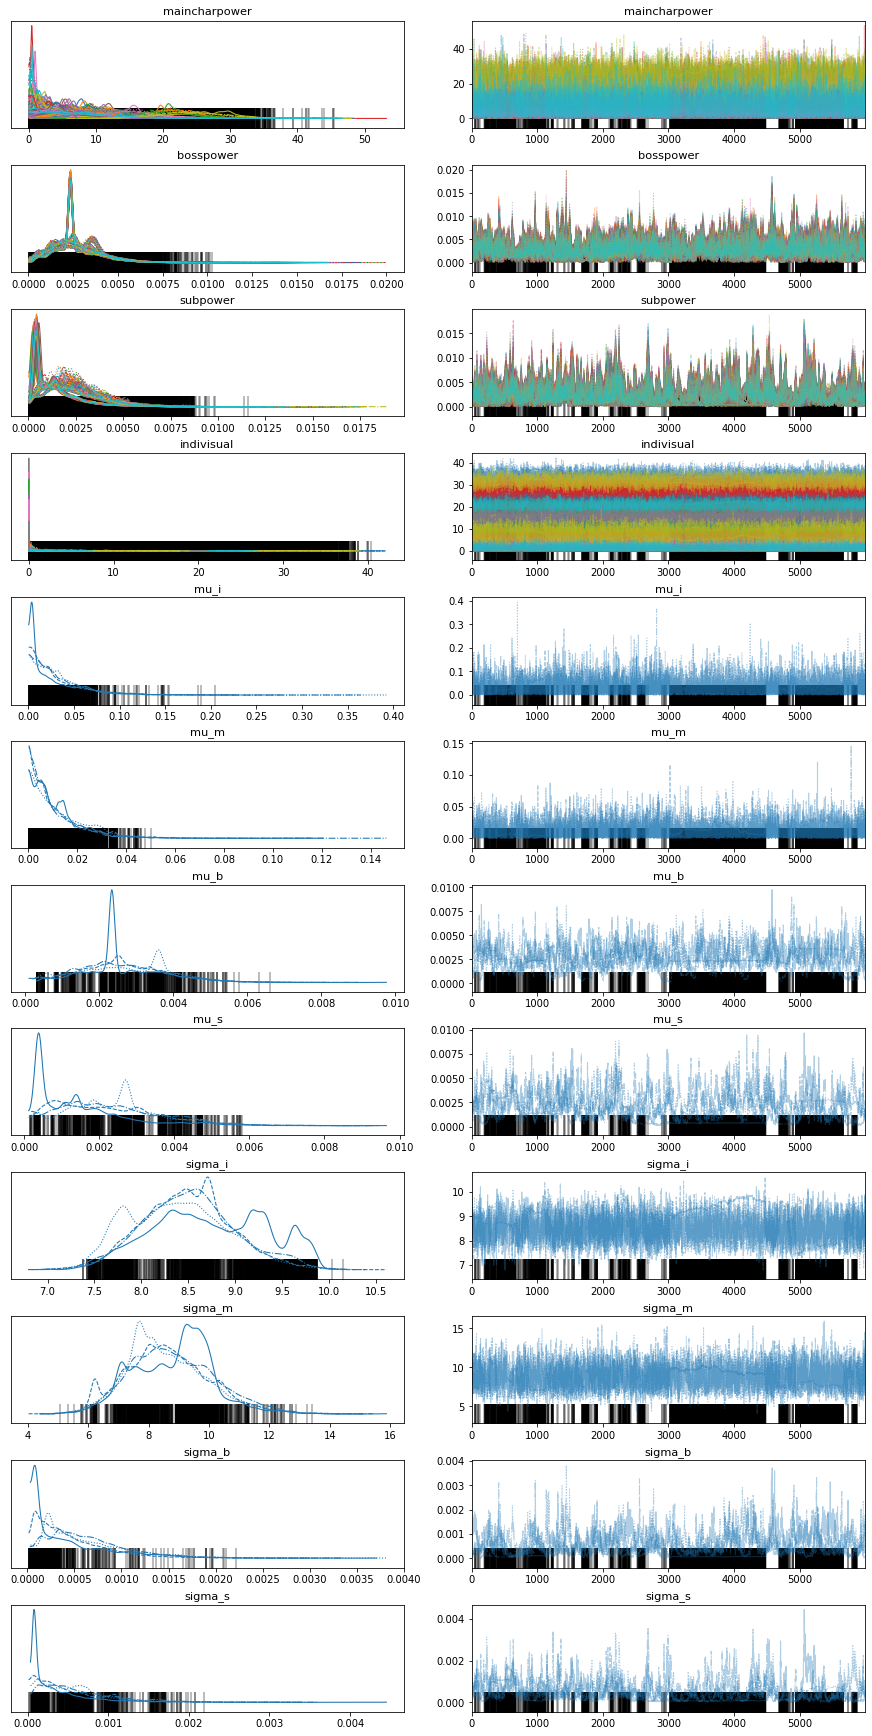

In [25]:
az.plot_trace(fit,backend_kwargs={"constrained_layout":True})

僅かだがsubpower, bosspowerの影響がある。

bosspower, levelには考慮の余地あり

In [ ]:
az.plot_density(fit)
#az.plot_density([],

CSVからインポートする場合

In [45]:
#df=pd.read_csv("postdata//posterior_charm.csv")
#df["chain"] = 3
#df["draw"] = np.arange(len(df), dtype=int)
#df = df.set_index(["chain", "draw"])
#dataset = az.InferenceData(posterior= xr.Dataset.from_dataframe(df))
#dataset

Inference data with groups:
	> posterior

# 整数title,非整数title固有の影響を加味した場合